In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        self.weights = np.zeros(((X.shape[1]), 1))
        
        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):
                
                start = batch*batch_size
                end = start + batch_size
                
                y_hat = self.predict(X[start:end]).reshape((batch_size,y.shape[1]))
   
                dw = (-2/batch_size) * (((X[start:end]).transpose()).dot(y[start:end]-y_hat))
                
                self.weights -= (lr * dw)
            
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        y_hat = self.predict(X)
        loss = y-y_hat
        return (np.square(loss)).sum() / len(y)

    def predict(self, X):
        y_hat = X.dot(self.weights)
        return y_hat
                
    def evaluate(self, X, y):
        y_hat = self.predict(X)
        loss = y-y_hat
        return (np.square(loss)).sum() / len(y)
    
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, label='Train MSE loss')
        plt.title("Training loss")
        plt.ylabel("MSE loss")
        plt.xlabel("Epoch")
        plt.legend(loc='upper right')
        plt.show()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################
df_train['sex'] = df_train['sex'].replace('female', 0)
df_train['sex'] = df_train['sex'].replace('male', 1)
df_train['smoker'] = df_train['smoker'].replace('no', 0)
df_train['smoker'] = df_train['smoker'].replace('yes', 1)
df_train['region'] = df_train['region'].replace('northeast', 0)
df_train['region'] = df_train['region'].replace('northwest', 1)
df_train['region'] = df_train['region'].replace('southeast', 2)
df_train['region'] = df_train['region'].replace('southwest', 3)


df_val['sex'] = df_val['sex'].replace('female', 0)
df_val['sex'] = df_val['sex'].replace('male', 1)
df_val['smoker'] = df_val['smoker'].replace('no', 0)
df_val['smoker'] = df_val['smoker'].replace('yes', 1)
df_val['region'] = df_val['region'].replace('northeast', 0)
df_val['region'] = df_val['region'].replace('northwest', 1)
df_val['region'] = df_val['region'].replace('southeast', 2)
df_val['region'] = df_val['region'].replace('southwest', 3)


df_test['sex'] = df_test['sex'].replace('female', 0)
df_test['sex'] = df_test['sex'].replace('male', 1)
df_test['smoker'] = df_test['smoker'].replace('no', 0)
df_test['smoker'] = df_test['smoker'].replace('yes', 1)
df_test['region'] = df_test['region'].replace('northeast', 0)
df_test['region'] = df_test['region'].replace('northwest', 1)
df_test['region'] = df_test['region'].replace('southeast', 2)
df_test['region'] = df_test['region'].replace('southwest', 3)

# You may try different label encoding for training your own model


# Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy().reshape(x_train.shape)
y_train = y_train.to_numpy().reshape((y_train.shape[0],1))
ones = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((x_train, ones), axis=1)

x_val = x_val.to_numpy().reshape(x_val.shape)
y_val = y_val.to_numpy().reshape((y_val.shape[0],1))
ones = np.ones((x_val.shape[0], 1))
x_val = np.concatenate((x_val, ones), axis=1)

x_test = x_test.to_numpy().reshape(x_test.shape)
ones = np.ones((x_val.shape[0], 1))
x_test = np.concatenate((x_test, ones), axis=1)

In [10]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.0007
epochs = 200000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [1382.48659588]
Weights:  [[380.13622217]]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48352107


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920277.39539412


In [14]:
test_pred = linear_reg.predict(x_test)

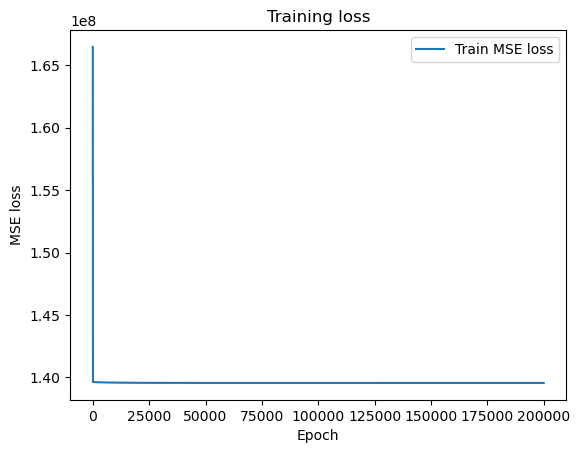

In [15]:
linear_reg.plot_curve()

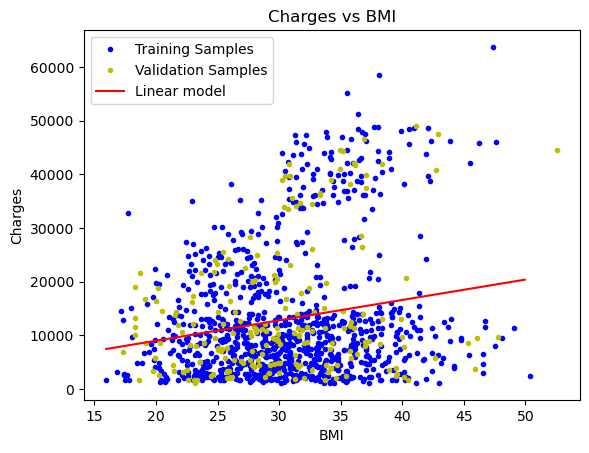

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
x = np.arange(min(x_train[:,0]),max(x_train[:,0]))
y = linear_reg.weights[:-1]*x + linear_reg.weights[-1]
y = y.transpose()
x = x.reshape(y.shape)
plt.plot(x_train[:,0], y_train, 'b.', label='Training Samples')
plt.plot(x_val[:,0], y_val, 'y.', label='Validation Samples')
plt.plot(x, y, 'r', label='Linear model')
plt.title("Charges vs BMI")
plt.ylabel("Charges")
plt.xlabel("BMI")
plt.legend(loc='upper left')
plt.show()


# Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy().reshape((938,6))
y_train = y_train.to_numpy().reshape((938,1))
ones = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((x_train, ones), axis=1)

x_val = x_val.to_numpy().reshape((200,6))
y_val = y_val.to_numpy().reshape((200,1))
ones = np.ones((x_val.shape[0], 1))
x_val = np.concatenate((x_val, ones), axis=1)

x_test = x_test.to_numpy().reshape((200,6))
ones = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((x_test, ones), axis=1)

In [19]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.00037
epochs = 585000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-11857.00272547]
Weights:  [[  259.85060879]
 [ -383.5487657 ]
 [  333.33128054]
 [  442.55657777]
 [24032.21873189]
 [ -416.01543495]]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25360506


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958561.80088313


In [23]:
test_pred = linear_reg.predict(x_test)

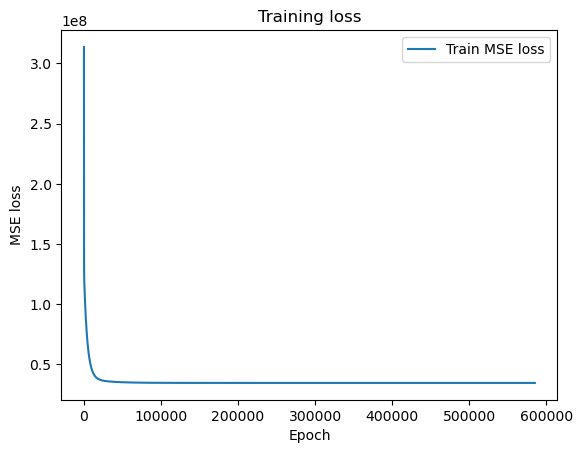

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

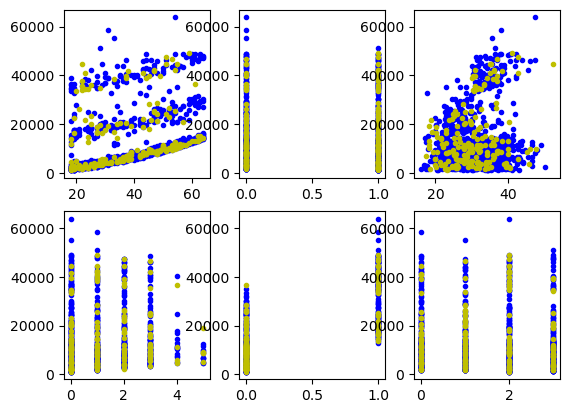

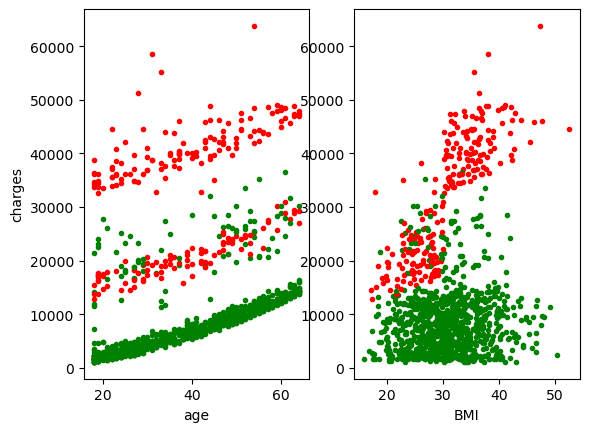

In [25]:
#data analysis
for i in range(6): 
    plt.subplot(2, 3, i+1)
    x = np.arange(min(x_train[:,i]),max(x_train[:,i]))
    # y = linear_reg.weights[:-1]*x + linear_reg.weights[-1]
    # y = y.transpose()
    x = x.transpose()
    plt.plot(x_train[:,i], y_train, 'b.', label='Training Samples')
    plt.plot(x_val[:,i], y_val, 'y.', label='Validation Samples')
plt.show()


age = np.concatenate((x_train[:, 0], x_val[:, 0]))
bmi = np.concatenate((x_train[:, 2], x_val[:, 2]))
smoke = np.concatenate((x_train[:, 4], x_val[:, 4]))
charge = np.concatenate((y_train, y_val))

plt.subplot(1, 2, 1)
plt.ylabel("charges")
plt.xlabel("age")
for i in range(len(age)):
    if smoke[i] == 1:
        plt.plot(age[i], charge[i], 'r.')
    else:
        plt.plot(age[i], charge[i], 'g.')
        
plt.subplot(1, 2, 2)
plt.xlabel("BMI")
for i in range(len(bmi)):
    if smoke[i] == 1:
        plt.plot(bmi[i], charge[i], 'r.')
    else:
        plt.plot(bmi[i], charge[i], 'g.')

In [26]:
#data preprocessing
def smoker_bmi(s,b):
    sb = np.zeros(s.shape)
    for i in range(len(s)):
        if s[i]==0:
            sb[i]=0
        elif b[i]<30:
            sb[i]=1
        else:
            sb[i]=2
    return sb

x_train = df_train.drop(['charges'], axis=1)
# x_train = x_train.drop(['region'], axis=1)
# x_train = x_train.drop(['sex'], axis=1)
x_train['smoker_bmi'] = smoker_bmi(x_train['smoker'], x_train['bmi'])
x_train = x_train.drop(['smoker'], axis=1)
x_train = x_train.drop(['bmi'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
# x_val = x_val.drop(['region'], axis=1)
# x_val = x_val.drop(['sex'], axis=1)
x_val['smoker_bmi'] = smoker_bmi(x_val['smoker'], x_val['bmi'])
x_val = x_val.drop(['smoker'], axis=1)
x_val = x_val.drop(['bmi'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)
# x_test = x_test.drop(['region'], axis=1)
x_test['smoker_bmi'] = smoker_bmi(x_test['smoker'], x_test['bmi'])
x_test = x_test.drop(['smoker'], axis=1)
x_test = x_test.drop(['bmi'], axis=1)
# x_test = x_test.drop(['sex'], axis=1)

In [27]:
x_train = x_train.to_numpy().reshape(x_train.shape)
y_train = y_train.to_numpy().reshape((y_train.shape[0],1))
ones = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((x_train, ones), axis=1)

x_val = x_val.to_numpy().reshape(x_val.shape)
y_val = y_val.to_numpy().reshape((y_val.shape[0],1))
ones = np.ones((x_val.shape[0], 1))
x_val = np.concatenate((x_val, ones), axis=1)

x_test = x_test.to_numpy().reshape(x_test.shape)
ones = np.ones((x_val.shape[0], 1))
x_test = np.concatenate((x_test, ones), axis=1)

In [28]:
batch_size = 50
lr = 0.00007
epochs = 20000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)


test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

Don't cheat.
test_pred shape:  (200, 1)


In [29]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

print('validation loss: ', linear_reg.evaluate(x_val, y_val))

training loss:  20057056.833778657
validation loss:  26304493.57293674


# Output the csv file

In [30]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("311551170_prediction.csv")